Predicción del consumo energético
📘 Contexto:

La eficiencia energética es una prioridad en las ciudades modernas. Las compañías eléctricas intentan predecir cuánto se consumirá en función de las condiciones meteorológicas. En este proyecto, desarrollarás un modelo de regresión lineal que permita predecir el consumo de energía en función de la temperatura ambiental.



🎯 Objetivo del proyecto:

Construir un sistema que:

Genere datos sintéticos con numpy representando temperatura (°C) y consumo energético (kWh).

Use regresión lineal (sklearn.linear_model.LinearRegression) para aprender la relación entre ambas variables.

Permita hacer predicciones para nuevas temperaturas.

Visualice los datos y el modelo con matplotlib.



🛠️ Requerimientos:

1. Crear una clase EnergyRecord

Guarda los atributos: temperature y consumption.

Añade un método .to_vector() que devuelva [temperature] como vector de entrada al modelo.

2. Generar los datos con una clase EnergyDataGenerator

Crea datos sintéticos con numpy.random.uniform(-5, 35) para la temperatura.

Calcula el consumo simulando que cuando hace más frío o más calor que 20 °C, el consumo aumenta:

consumo = 100 + (abs(temperatura - 20) * 3) + ruido

Añade un poco de ruido con numpy.random.normal(0, 5).

3. Crear la clase EnergyRegressor

Usa LinearRegression de sklearn para ajustar el modelo.

Métodos necesarios:

fit() para entrenar con una lista de EnergyRecord.

predict(temperature) para predecir consumo dado una temperatura.

get_model() para acceder al modelo (útil para graficar).

4. Implementar una clase EnergyPredictionExample

Que cree los datos, entrene el modelo y prediga para una temperatura nueva (por ejemplo, 30 °C).

También debe mostrar una gráfica:

Un scatter plot de los datos.

Una línea roja representando la recta de regresión.

5. Visualización con matplotlib

Agrega títulos, etiquetas de ejes y leyenda para una mejor comprensión.

Usa .plot() para la línea de predicción del modelo.



✅ Ejemplo de uso

example = EnergyPredictionExample()
example.run()


Salida esperada

🔍 Temperatura: 30 °C
⚡ Predicción de consumo: 120.70 kWh





🔍 Temperatura: 30 °C
⚡ Predicción de consumo: 115.87 kWh


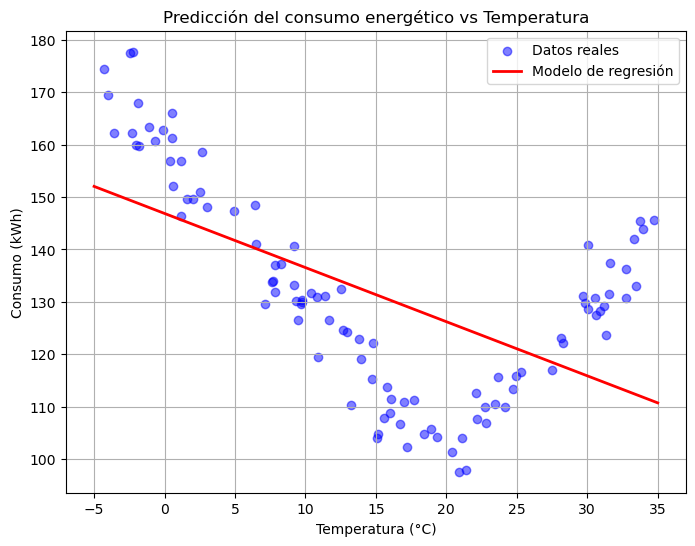

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Clase EnergyRecord
class EnergyRecord:
    def __init__(self, temperature, consumption):
        self.temperature = temperature
        self.consumption = consumption

    def to_vector(self):
        return [self.temperature]

# 2. Clase EnergyDataGenerator
class EnergyDataGenerator:
    def __init__(self, n_samples=100):
        self.n_samples = n_samples

    def generate(self):  # Cambié el nombre de generate_data a generate
        temperatures = np.random.uniform(-5, 35, self.n_samples)
        consumption = 100 + (np.abs(temperatures - 20) * 3) + np.random.normal(0, 5, self.n_samples)
        
        # Generamos los registros
        records = [EnergyRecord(t, c) for t, c in zip(temperatures, consumption)]
        return records

# 3. Clase EnergyRegressor
class EnergyRegressor:
    def __init__(self):
        self.model = LinearRegression()

    def fit(self, records):
        X = np.array([r.to_vector() for r in records])
        y = np.array([r.consumption for r in records])
        self.model.fit(X, y)

    def predict(self, temperature):
        prediction = self.model.predict([[temperature]])
        return float(prediction[0])  # Convertimos el resultado a float

    def get_model(self):
        return self.model

# 4. Clase EnergyPredictionExample
class EnergyPredictionExample:
    def __init__(self):
        self.generator = EnergyDataGenerator()
        self.regressor = EnergyRegressor()

    def run(self):
        # Generar datos sintéticos
        records = self.generator.generate()  # Cambié el nombre de generate_data a generate
        
        # Entrenar el modelo
        self.regressor.fit(records)
        
        # Realizar predicción para una temperatura nueva (30 °C)
        temperature = 30
        predicted_consumption = self.regressor.predict(temperature)
        
        # Imprimir la predicción
        print(f"🔍 Temperatura: {temperature} °C")
        print(f"⚡ Predicción de consumo: {predicted_consumption:.2f} kWh")
        
        # Visualización
        self.visualize(records)

    def visualize(self, records):
        # Datos
        X = np.array([r.to_vector() for r in records])
        y = np.array([r.consumption for r in records])

        # Predicción de la recta de regresión
        line_x = np.linspace(-5, 35, 100)
        line_y = self.regressor.get_model().predict(line_x.reshape(-1, 1))

        # Crear la gráfica
        plt.figure(figsize=(8, 6))
        plt.scatter(X, y, color='blue', label='Datos reales', alpha=0.5)
        plt.plot(line_x, line_y, color='red', label='Modelo de regresión', linewidth=2)
        plt.title('Predicción del consumo energético vs Temperatura')
        plt.xlabel('Temperatura (°C)')
        plt.ylabel('Consumo (kWh)')
        plt.legend()
        plt.grid(True)
        plt.show()

# Ejemplo de uso
example = EnergyPredictionExample()
example.run()
